In [1]:
import pandas as pd

DATA_PATH = 'data/churn.xlsx'

df = pd.read_excel(DATA_PATH)
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [2]:
# All the customer IDs appears once
df['customerID'].value_counts()[df['customerID'].value_counts() != 1]

Series([], Name: count, dtype: int64)

In [3]:
df[df['tenure'] > 65]['tenure'].value_counts()

tenure
72    362
71    170
70    119
68    100
67     98
69     95
66     89
Name: count, dtype: int64

In [4]:
df[(df['tenure'] > 65) & (df['Partner'] == 'No')]['tenure'].value_counts()

tenure
72    51
66    35
71    29
67    29
68    26
69    25
70    23
Name: count, dtype: int64

In [5]:
df[~(df['tenure'] > 6)]['tenure'].value_counts()

tenure
1    613
2    238
3    200
4    176
5    133
6    110
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='customerID'>

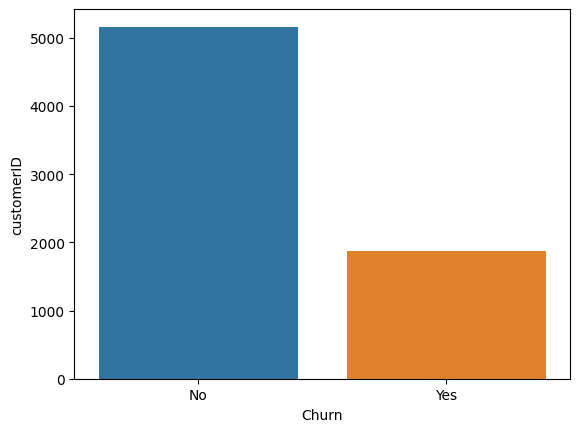

In [6]:
import seaborn as sns

sns.barplot(data=df.groupby('Churn')['customerID'].count().reset_index(), x='Churn', y='customerID')

<Axes: xlabel='PaymentMethod', ylabel='customerID'>

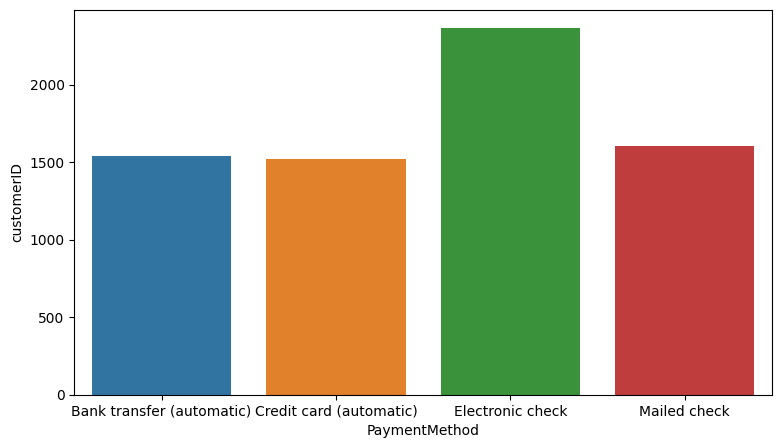

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=[9, 5])
sns.barplot(data=df.groupby('PaymentMethod')['customerID'].count().reset_index(), x='PaymentMethod', y='customerID')

<Axes: xlabel='gender', ylabel='customerID'>

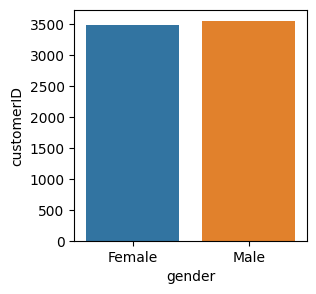

In [8]:
plt.figure(figsize=[3, 3])
sns.barplot(data=df.groupby('gender')['customerID'].count().reset_index(), x='gender', y='customerID')

<Axes: xlabel='PaymentMethod', ylabel='customerID'>

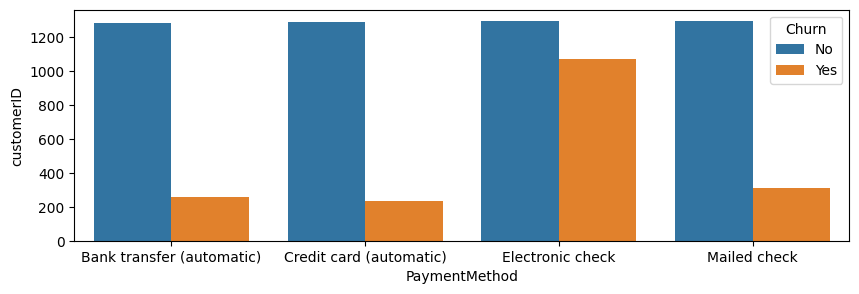

In [9]:
plt.figure(figsize=[10, 3])
sns.barplot(data=df.groupby(['Churn', 'PaymentMethod'])['customerID'].count().reset_index(), x='PaymentMethod', y='customerID', hue='Churn')

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
mm = MinMaxScaler()

y = le.fit_transform(df['Churn'])
X = pd.DataFrame( # fit_transform returns an array, then convert to DF
  mm.fit_transform(
  pd.get_dummies( # Get dummies from X
  df.drop(columns=['customerID', 'Churn'], axis=1))))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [13]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
773,0.0,1.000000,0.919403,0.928554,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6636,0.0,0.014085,0.018408,0.002423,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
58,0.0,0.464789,0.066667,0.101027,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
4113,0.0,0.352113,0.603980,0.232570,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


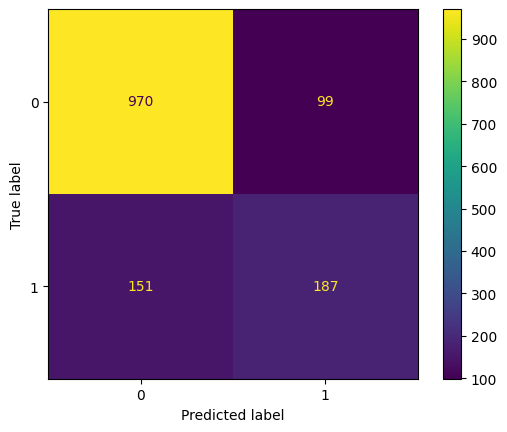

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(X_test))).plot()

In [15]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'accuracy (train) -> {accuracy_score(y_train, lr.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, lr.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, lr.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, lr.predict(X_test))}\n\
===============================================\n\
precision (train) -> {precision_score(y_train, lr.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, lr.predict(X_test))}\n\
=======================================\n\
recall (train) -> {recall_score(y_train, lr.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, lr.predict(X_test))}\n\
====================================\n\
f1_score (train) -> {f1_score(y_train, lr.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, lr.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.8032
accuracy (test)  -> 0.822316986496091
balanced accuracy (train) -> 0.7251600771803826
balanced accuracy (test)  -> 0.7303222610303275
precision (train) -> 0.6666666666666666
precision (test)  -> 0.6538461538461539
recall (train) -> 0.5538863487916394
recall (test)  -> 0.5532544378698225
f1_score (train) -> 0.6050660007135212
f1_score (test)  -> 0.5993589743589745
rocauc (train) -> 0.844138496475861
rocauc (test)  -> 0.858058739849774


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
X_test.assign(churn = y_test).assign(label = rfc.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
773,0.0,1.000000,0.919403,0.928554,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
6636,0.0,0.014085,0.018408,0.002423,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
58,0.0,0.464789,0.066667,0.101027,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
4113,0.0,0.352113,0.603980,0.232570,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


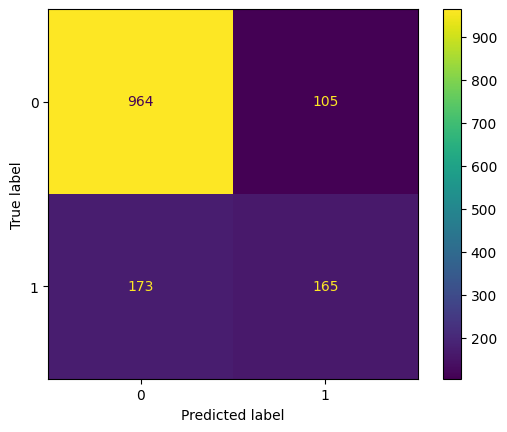

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc.predict(X_test))).plot()

In [19]:
print(f'accuracy (train) -> {accuracy_score(y_train, rfc.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, rfc.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, rfc.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, rfc.predict(X_test))}\n\
===============================================\n\
precision (train) -> {precision_score(y_train, rfc.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, rfc.predict(X_test))}\n\
=======================================\n\
recall (train) -> {recall_score(y_train, rfc.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, rfc.predict(X_test))}\n\
====================================\n\
f1_score (train) -> {f1_score(y_train, rfc.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, rfc.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, rfc.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.9975111111111111
accuracy (test)  -> 0.8024164889836531
balanced accuracy (train) -> 0.9960411869084356
balanced accuracy (test)  -> 0.6949715212469764
precision (train) -> 0.9980302035456337
precision (test)  -> 0.6111111111111112
recall (train) -> 0.992815153494448
recall (test)  -> 0.4881656804733728
f1_score (train) -> 0.9954158480681073
f1_score (test)  -> 0.542763157894737
rocauc (train) -> 0.9999392939979712
rocauc (test)  -> 0.822302544544755


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [i for i in range(1, 11)],
              'n_estimators': [100, 300, 500]}

gs = GridSearchCV(rfc, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [22]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfc_tunned = RandomForestClassifier(bootstrap=True,
 ccp_alpha=0.0,
 class_weight=None,
 criterion='gini',
 max_depth=8,
 max_features='sqrt',
 max_leaf_nodes=None,
 max_samples=None,
 min_impurity_decrease=0.0,
 min_samples_leaf=1,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 n_estimators=300,
 n_jobs=None,
 oob_score=False,
 random_state=None,
 verbose=0,
 warm_start=False)
rfc_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=300)

In [ ]:
X_test.assign(churn = y_test).assign(label = rfc_tunned.predict(X_test)).head(4)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3356,0.0,0.000000,0.364677,0.004166,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
6809,0.0,0.816901,0.747264,0.619398,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
484,0.0,0.098592,0.649751,0.076304,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4130,0.0,0.154930,0.018408,0.024648,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0


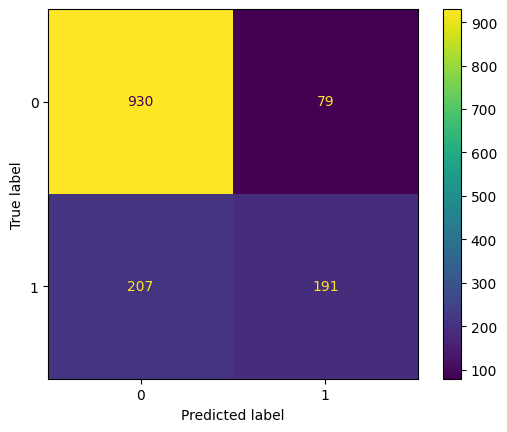

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_tunned.predict(X_test))).plot()

In [ ]:
print(f'accuracy (train) -> {accuracy_score(y_train, rfc_tunned.predict(X_train))}\n\
accuracy (test)  -> {accuracy_score(y_test, rfc_tunned.predict(X_test))}\n\
======================================\n\
balanced accuracy (train) -> {balanced_accuracy_score(y_train, rfc_tunned.predict(X_train))}\n\
balanced accuracy (test)  -> {balanced_accuracy_score(y_test, rfc_tunned.predict(X_test))}\n\
===============================================\n\
precision (train) -> {precision_score(y_train, rfc_tunned.predict(X_train))}\n\
precision (test)  -> {precision_score(y_test, rfc_tunned.predict(X_test))}\n\
=======================================\n\
recall (train) -> {recall_score(y_train, rfc_tunned.predict(X_train))}\n\
recall (test)  -> {recall_score(y_test, rfc_tunned.predict(X_test))}\n\
====================================\n\
f1_score (train) -> {f1_score(y_train, rfc_tunned.predict(X_train))}\n\
f1_score (test)  -> {f1_score(y_test, rfc_tunned.predict(X_test))}\n\
======================================\n\
rocauc (train) -> {roc_auc_score(y_train, rfc_tunned.predict_proba(X_train)[:,1])}\n\
rocauc (test)  -> {roc_auc_score(y_test, rfc_tunned.predict_proba(X_test)[:,1])}')

accuracy (train) -> 0.8346666666666667
accuracy (test)  -> 0.7967306325515281
balanced accuracy (train) -> 0.7486524909279615
balanced accuracy (test)  -> 0.7008020777823707
precision (train) -> 0.7391688770999116
precision (test)  -> 0.7074074074074074
recall (train) -> 0.5683208701563562
recall (test)  -> 0.4798994974874372
f1_score (train) -> 0.6425826287471177
f1_score (test)  -> 0.5718562874251497
rocauc (train) -> 0.906579523164424
rocauc (test)  -> 0.8480783501252546
